In [1]:
import dask.dataframe as dd
from dask.distributed import Client

In [20]:
client = Client(
    n_workers=4,
    threads_per_worker=2,
    memory_limit='32GB'
)

c:\Users\dmitrii.druzhbin\AppData\Local\miniconda3\envs\snowcast\Lib\site-packages\distributed\node.py:187: UserWarning: Port 8787 is already in use.
Perhaps you already have a cluster running?
Hosting the HTTP server on port 49523 instead
  warnings.warn(
c:\Users\dmitrii.druzhbin\AppData\Local\miniconda3\envs\snowcast\Lib\contextlib.py:144: UserWarning: Creating scratch directories is taking a surprisingly long time. (1.12s) This is often due to running workers on a network file system. Consider specifying a local-directory to point workers to write scratch data to a local disk.
  next(self.gen)


In [14]:
data_repo = "../data/raw/QUOT_SIM2_2010-2019.csv.gz"

In [15]:
df = dd.read_csv(data_repo ,sep=";",  blocksize=None)

In [16]:
df["DATE"] = dd.to_datetime(df["DATE"], format="%Y%m%d", errors="coerce")

In [17]:
df_chamrousse = df[
    (df["LAMBX"] >= 8700) & (df["LAMBX"] <= 8800) &
    (df["LAMBY"] >= 20150) & (df["LAMBY"] <= 20250)
]

In [22]:
df_chamrousse.to_csv("chamrousse_filtered_2010-2019.csv",single_file=True, index=False)

['c:\\Users\\dmitrii.druzhbin\\Documents\\climatest\\dfg\\chamrousse_filtered_2010-2019.csv']

In [23]:
import pandas as pd

In [24]:
df_1 = pd.read_csv('./data/raw/chamrousse_filtered_2010-2019.csv')

In [25]:
df_2 = pd.read_csv('./data/raw/chamrousse_filtered_2020-2025.csv')

In [26]:
df_total = pd.concat([df_1, df_2])

In [28]:
df_total['DATE'] = pd.to_datetime(df_total['DATE'])

In [30]:
df_total.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11382 entries, 0 to 4077
Data columns (total 28 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   LAMBX          11382 non-null  int64         
 1   LAMBY          11382 non-null  int64         
 2   DATE           11382 non-null  datetime64[ns]
 3   PRENEI_Q       11382 non-null  float64       
 4   PRELIQ_Q       11382 non-null  float64       
 5   T_Q            11382 non-null  float64       
 6   FF_Q           11382 non-null  float64       
 7   Q_Q            11382 non-null  float64       
 8   DLI_Q          11382 non-null  float64       
 9   SSI_Q          11382 non-null  float64       
 10  HU_Q           11382 non-null  float64       
 11  EVAP_Q         11382 non-null  float64       
 12  ETP_Q          11382 non-null  float64       
 13  PE_Q           11382 non-null  float64       
 14  SWI_Q          11382 non-null  float64       
 15  DRAINC_Q       11382 non-

In [60]:
df_total.columns

Index(['LAMBX', 'LAMBY', 'DATE', 'PRENEI_Q', 'PRELIQ_Q', 'T_Q', 'FF_Q', 'Q_Q',
       'DLI_Q', 'SSI_Q', 'HU_Q', 'EVAP_Q', 'ETP_Q', 'PE_Q', 'SWI_Q',
       'DRAINC_Q', 'RUNC_Q', 'RESR_NEIGE_Q', 'RESR_NEIGE6_Q', 'HTEURNEIGE_Q',
       'HTEURNEIGE6_Q', 'HTEURNEIGEX_Q', 'SNOW_FRAC_Q', 'ECOULEMENT_Q',
       'WG_RACINE_Q', 'WGI_RACINE_Q', 'TINF_H_Q', 'TSUP_H_Q', 'MONTH'],
      dtype='object')

In [31]:
df_total["MONTH"] = df_total["DATE"].dt.month
df_winter = df_total[(df_total["MONTH"] >= 11) | (df_total["MONTH"] <= 5)]

In [40]:
df_winter = df_winter[df_winter['LAMBY'] == 20170]

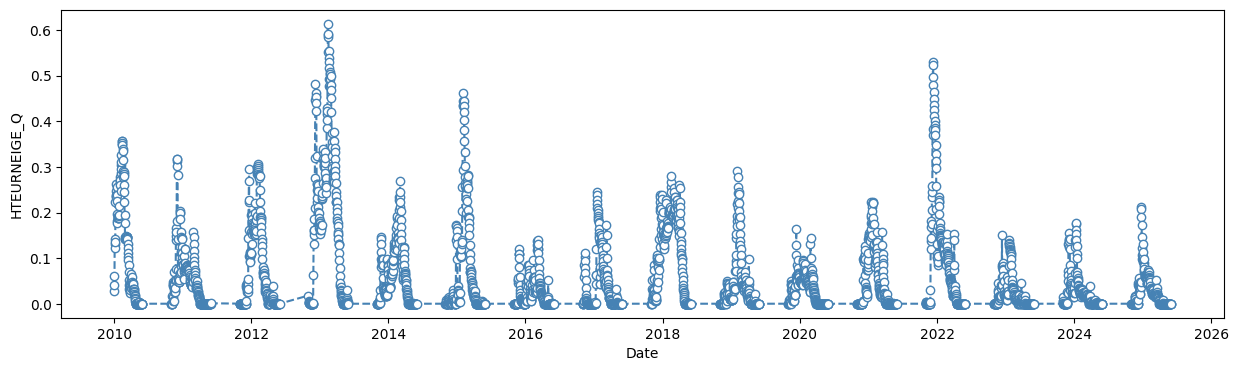

In [57]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15,4))
plt.plot(df_winter.reset_index(drop=True)['DATE'], 
         df_winter.reset_index(drop=True)['HTEURNEIGE_Q'], marker='o', 
         color='steelblue', markerfacecolor='white', linestyle='--')
plt.xlabel('Date')
plt.ylabel('HTEURNEIGE_Q');


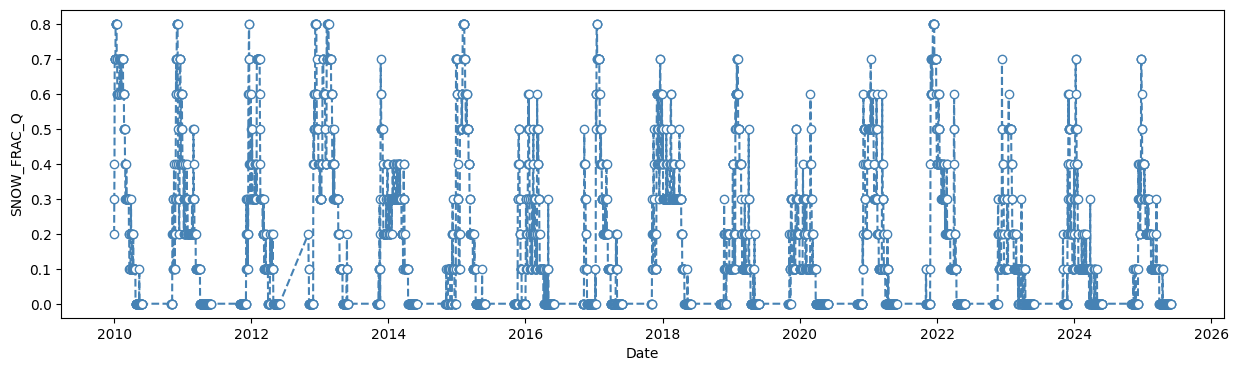

In [58]:
plt.figure(figsize=(15,4))
plt.plot(df_winter.reset_index(drop=True)['DATE'], 
         df_winter.reset_index(drop=True)['SNOW_FRAC_Q'], marker='o', 
         color='steelblue', markerfacecolor='white', linestyle='--')
plt.xlabel('Date')
plt.ylabel('SNOW_FRAC_Q');

In [59]:
df_winter.to_csv('df_clean.csv', index=False)